<div style="text-align: right"> 06.12.2019</div>

***Name:*** 

# Hausaufgabe Blatt 7

## Pendel: Energie

In dieser Aufgabe werden wir erneut die Bewegungsgleichung eines Pendels numerisch lösen und dabei dieses mal die Energie des Systems betrachten. Die Bewegungsgleichung eines Pendels (ohne Kleinwinkelnäherung) lautet:

\begin{equation*}
       \ddot{\varphi} = -\frac{g}{L} \sin \varphi 
\end{equation*}

Die nach dem Euler Verfahren diskretisierte Gleichungen lauten:

\begin{align*}
    \omega \left(t+\Delta t\right) &= \omega \left(t\right) -\frac{g}{L} \sin  \varphi \left(t\right) \cdot \Delta t  \tag{1} \\
        \varphi \left(t + \Delta t\right) &=\varphi\left(t \right) + 
        \omega\left(t\right) \cdot \Delta t \tag{2}
\end{align*}

Die potentielle Energie $E_p$ und die kinetische Energie $E_{kin}$ sind gegeben durch:
\begin{align*}
E_p &= m \cdot g \cdot L \left( 1 - \cos \varphi \right) \\
E_{kin} &= \frac{m}{2} v^2 = \frac{m}{2}L^2 \dot \varphi ^2
\end{align*}

Die konstante Gesamtenergie ist durch die potentielle Energie bei anfänglicher Auslenkung $\varphi_0$ gegeben
\begin{align*}
E = m \cdot g \cdot L\left(1-\cos \varphi_0\right). \tag{3}
\end{align*}



### 1. Numerische Integration
Auf Blatt 6 haben Sie die Pendelgleichungen (1 + 2) numerisch integriert. Der Code dafür steht in der folgenden Zelle. Führen Sie diesen aus, bevor Sie bei "2. Energie" weiterarbeiten. Hier haben wir $N=2000$ Zeitschritte, wobei $\Delta t=0.004$, $\omega(t=0)=0$ und $\varphi_0 = \varphi(t=0)=\pi/4$ sein soll. Die Länge des Pendels ist $L=1$, die Masse $m=1$ und $g$ die Erdbeschleunigung.  


In [2]:
# numerische Integration der Schwingungsgleichung eines mathematischen Pendels
import numpy as np # lade Bibliotheken

L = 1 # Pendellänge
g = 9.81 # Erdbeschleunigung
m = 1 # Masse
N = 2000 # Anzahl Zeitschritte

dt = 0.004 # Zeitintervall 
w = 0 # Winkelgeschwindigkeit 
phi = (np.pi/4) # Winkel 
t = np.linspace(0, N*dt, N) # Zeit
resultsw = [0] # Liste für berechnete Winkelgeschwindigkeit
resultsphi = [np.pi/4] # Liste für berechnete Winkel


for i in range(N): # for-Schleife zur Aktualisierung der Winkelgeschwindigkeit und des Winkels
    wtemp = w # Zwischenspeichern der Winkelgeschwindigkeit, damit phi nicht mit dem aktualisierten omega berechnet wird
    w = w - g/L*np.sin(phi)*dt # update omage
    resultsw.append(w) # speichere omega
    phi = phi+wtemp*dt # update phi
    resultsphi.append(phi) # speichere phi

## 2. Energie
**a)** Schreiben Sie eine Funktion, die Ihnen die potentielle, kinetische und gesamte Energie abhängig vom Winkel $\varphi$ und der Winkelgeschwindigkeit $\omega$ berechnet und zurück gibt.

In [6]:
Ep=[]
Ek=[]
ES=[]

for i in range(N):
    Ept=m*g*L*(1-np.cos(resultsphi[i]))
    Ekt=(m/2)*(resultsw[i])**2
    ESt=Ept+Ekt
    Ep.append(Ept)
    Ek.append(Ekt)
    ES.append(ESt)
    
E=m*g*L*(1-np.cos(np.pi/4))
print(E)

2.8732824765599685


**b)** Plotten Sie die kinetische, potentielle und gesamte Energie gegen die Zeit. Vergleichen Sie das Ergebnis mit der erwarteten gesamten Energie (Gleichung (3)). Warum sehen Sie eine Abweichung?

Benutzen Sie zum plotten einer horizontalen Linie `ax.hlines(value, xStart, xEnd)`, wobei `value` der y-Wert und `xStart` und `xEnd` die Anfangs- und End-Punkte der Linie sind.

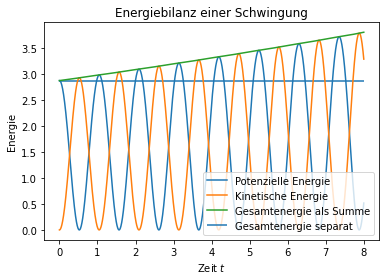

In [12]:
import matplotlib.pyplot as plt
#t = np.linspace(0, 5.998, 0.002)
#t = np.linspace(0, N*dt, N+1)
#vNumeric = v                          
#tNumeric = np.linspace(0, 2999*dt , 2999) 

fig, ax = plt.subplots()
ax.hlines(E, 0, N*dt, label='Gesamtenergie separat')
ax.set_title("Energiebilanz einer Schwingung")  # Titel
ax.plot(t, Ep, label='Potenzielle Energie')  # x-Wert, hier x, y Wert hier xQuadrat
ax.plot(t, Ek, label='Kinetische Energie')
ax.plot(t, ES, label='Gesamtenergie als Summe')
ax.set_xlabel("Zeit $t$")
ax.set_ylabel("Energie")

plt.legend(loc=4)
plt.show()

Aus Hausaufgabe 6 ist bekannt, dass sich die Trajektorie einer Schwingung in positive x-Richtung (der Zeitachse)
ausdehnt, der Oszillator also langsamer wird. Hier wächst die Gesamtenergie der numerischen Lösung in y-Richtung,
anstatt konstant zu bleiben (statt blauer Linie ergibt sich die Grüne), da die y-Werte von den  Werten von phi (bzw. entsprechend omega) abhängen. Ein langsamer werdendes System gibt eigentlich nach außen Ernergie ab, davon soll hier aber nicht ausgegangen werden (konstante blaue Linie). So "staut" sich hier beim Langsamwerden Energie
auf und die Gesamtenergie wächst.